In [1]:
# Load specific forecasting and evaluation tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import dates
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
# Load datasets
df = pd.read_excel('TestData1D_faultless.xls', index_col= 'time', parse_dates= True)
df = df.dropna()
df.head()


,RMS_Value
time,
2019-11-28 06:00:00,0.917229
2019-11-28 06:03:00,0.930076
2019-11-28 06:06:00,0.915681
2019-11-28 06:09:00,0.938059
2019-11-28 06:12:00,0.927987


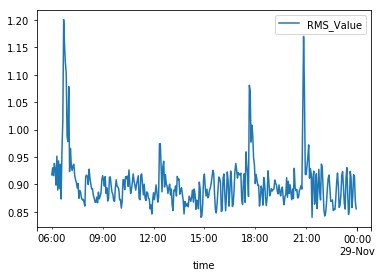

In [3]:
df.plot()

C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.006633, expected=0.990183
predicted=0.995746, expected=0.948349
predicted=0.963374, expected=0.935904
predicted=0.944269, expected=0.901213
predicted=0.913788, expected=0.917952
predicted=0.916721, expected=0.907859
predicted=0.910442, expected=0.897937
predicted=0.901553, expected=0.898237
predicted=0.899129, expected=0.860127
predicted=0.871375, expected=0.875406
predicted=0.874042, expected=0.896681
predicted=0.889872, expected=0.889165
predicted=0.889249, expected=0.861806
predicted=0.869734, expected=0.912482
predicted=0.899532, expected=0.903038
predicted=0.901915, expected=0.875644
predicted=0.883459, expected=0.860894
predicted=0.867457, expected=0.876072
predicted=0.873296, expected=0.924517
predicted=0.908996, expected=0.904968
predicted=0.906117, expected=0.878930
predicted=0.887085, expected=0.884526
predicted=0.885168, expected=0.892019
predicted=0.889813, expected=0.887578
predicted=0.888136, expected=0.890288
predicted=0.889514, expected=0.891363
predicted=0.

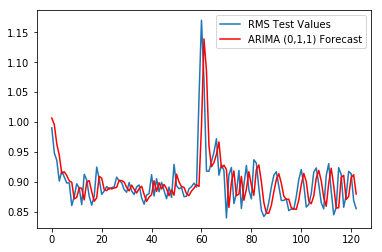

In [6]:
#Rollimg Prediction
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test, label = 'RMS Test Values' )
plt.plot(predictions, color='red', label = 'ARIMA (0,1,1) Forecast') 
plt.legend(loc='best')
plt.show()

In [2]:
# Load datasets
dfN = pd.read_excel('TestDataNight_faultless.xls', index_col= 'time', parse_dates= True)
dfN = dfN.dropna()
dfN.head()


,RMS_Value
time,
2019-11-28 05:56:40,0.956916
2019-11-28 06:00:50,0.911333
2019-11-28 06:05:00,0.924774
2019-11-28 06:09:10,0.926232
2019-11-28 06:13:20,0.920059


C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


predicted=0.890427, expected=0.870455
predicted=0.876858, expected=0.866393
predicted=0.869565, expected=0.851921
predicted=0.857408, expected=0.855911
predicted=0.856045, expected=0.882237
predicted=0.873232, expected=0.914670
predicted=0.900939, expected=0.894704
predicted=0.896543, expected=0.857412
predicted=0.870085, expected=0.874963
predicted=0.873067, expected=0.921192
predicted=0.904950, expected=0.908839
predicted=0.907412, expected=0.865643
predicted=0.879464, expected=0.872213
predicted=0.874362, expected=0.926648
predicted=0.908685, expected=0.881993
predicted=0.890975, expected=0.846864
predicted=0.861769, expected=0.910105
predicted=0.892851, expected=0.896467
predicted=0.894998, expected=0.863077
predicted=0.874257, expected=0.914135
predicted=0.899498, expected=0.901064
predicted=0.900335, expected=0.852528
predicted=0.869777, expected=0.927361
predicted=0.905606, expected=0.898028
predicted=0.900731, expected=0.864827
predicted=0.878282, expected=0.911857
predicted=0.

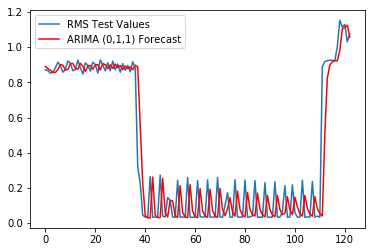

In [3]:
#Rollimg Prediction
X = dfN.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test, label = 'RMS Test Values' )
plt.plot(predictions, color='red', label = 'ARIMA (0,1,1) Forecast') 
plt.legend(loc='best')
plt.show()

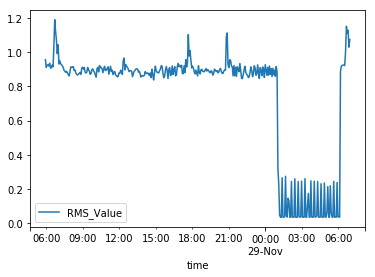

In [4]:
dfN.plot()

In [9]:
dfN2 = dfN['2019-11-28 05:56:40':'2019-11-29 02:00:00']
dfN2.head()

,RMS_Value
time,
2019-11-28 05:56:40,0.956916
2019-11-28 06:00:50,0.911333
2019-11-28 06:05:00,0.924774
2019-11-28 06:09:10,0.926232
2019-11-28 06:13:20,0.920059


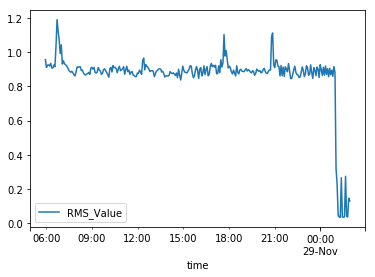

In [10]:
dfN2.plot()

C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


predicted=0.893301, expected=0.904403
predicted=0.900870, expected=0.890181
predicted=0.893102, expected=0.898191
predicted=0.896421, expected=0.893094
predicted=0.893827, expected=0.883880
predicted=0.886554, expected=0.879967
predicted=0.881610, expected=0.892026
predicted=0.888629, expected=0.886482
predicted=0.886832, expected=0.865763
predicted=0.871699, expected=0.876538
predicted=0.874742, expected=0.901553
predicted=0.893253, expected=0.893890
predicted=0.893447, expected=0.888015
predicted=0.889373, expected=0.893319
predicted=0.891876, expected=0.880014
predicted=0.883280, expected=0.883069
predicted=0.882833, expected=0.898891
predicted=0.893814, expected=0.905835
predicted=0.902031, expected=0.888114
predicted=0.892049, expected=0.877417
predicted=0.881511, expected=0.876084
predicted=0.877390, expected=0.889878
predicted=0.885848, expected=0.896413
predicted=0.893001, expected=0.895757
predicted=0.894698, expected=1.091407
predicted=1.034350, expected=1.113501
predicted=1.

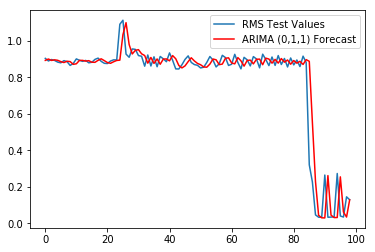

In [11]:
#Rollimg Prediction
X = dfN2.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test, label = 'RMS Test Values' )
plt.plot(predictions, color='red', label = 'ARIMA (0,1,1) Forecast') 
plt.legend(loc='best')
plt.show()

In [12]:
len(X)

289

In [13]:
len(dfN2)


289